<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 144.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 175.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 73.7 MB/s eta 0:00:00


#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




/tmp/ipykernel_301/273084313.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = df1.groupby('Age')['JobSatPoints_6'].mean().reset_index()


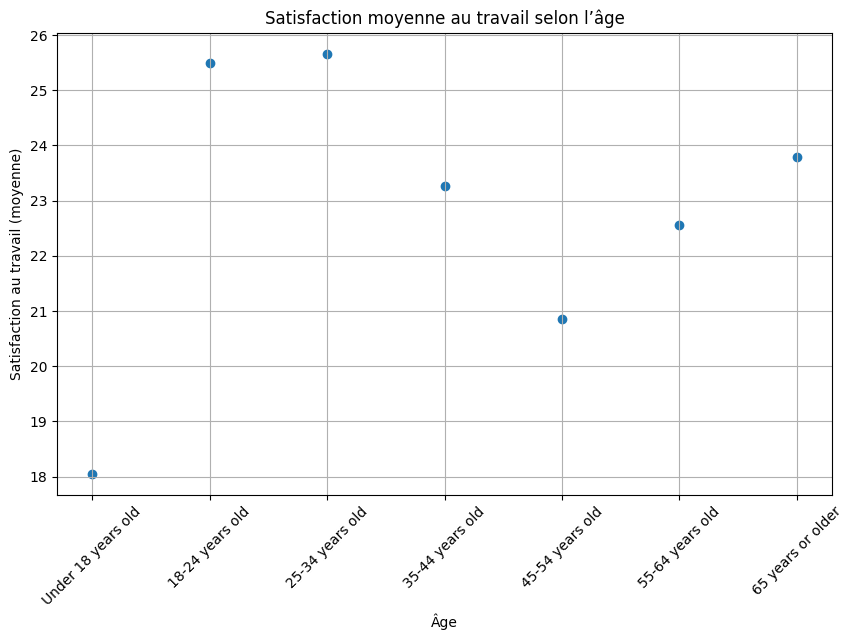

In [3]:
## Write your code here

df1 = df[['Age', 'JobSatPoints_6']]    
df1 = df1.dropna(subset=['JobSatPoints_6'])
df1['JobSatPoints_6'] = pd.to_numeric(df1['JobSatPoints_6'], errors='coerce').astype('float')

df1 = df1[df1['Age'] != 'Prefer not to say']

age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older']
    
df1['Age'] = pd.Categorical(df1['Age'], categories=age_order, ordered=True)

df1 = df1.groupby('Age')['JobSatPoints_6'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.scatter(x='Age', y='JobSatPoints_6', data=df1)
plt.xlabel('Âge')
plt.ylabel('Satisfaction au travail (moyenne)')
plt.xticks(rotation=45)
plt.title('Satisfaction moyenne au travail selon l’âge')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


/tmp/ipykernel_301/4280653899.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'], inplace=True)
/tmp/ipykernel_301/4280653899.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2_grouped = df2.groupby('SalaryBin')['JobSatPoints_6'].mean().reset_index()


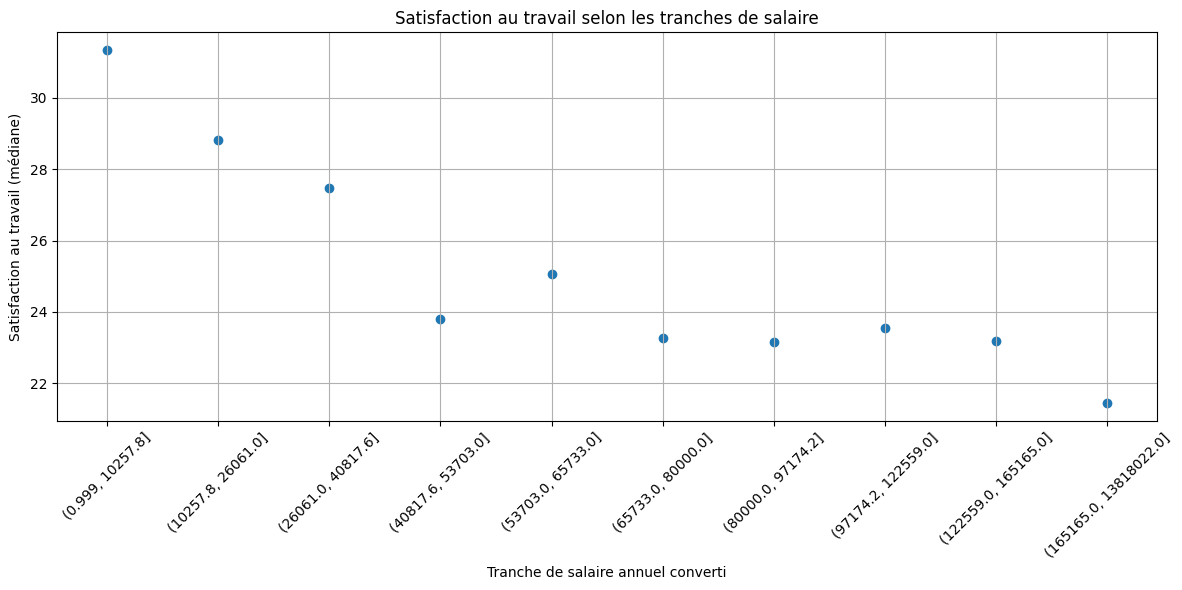

In [4]:
## Write your code here
df2 = df[['ConvertedCompYearly', 'JobSatPoints_6']]

df2.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'], inplace=True)

df2 = df[['ConvertedCompYearly', 'JobSatPoints_6']].dropna()
df2['ConvertedCompYearly'] = pd.to_numeric(df2['ConvertedCompYearly'], errors='coerce')
df2['JobSatPoints_6'] = pd.to_numeric(df2['JobSatPoints_6'], errors='coerce')

df2['SalaryBin'] = pd.qcut(df2['ConvertedCompYearly'], q=10)

df2_grouped = df2.groupby('SalaryBin')['JobSatPoints_6'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.scatter(df2_grouped['SalaryBin'].astype(str), df2_grouped['JobSatPoints_6'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Tranche de salaire annuel converti')
plt.ylabel('Satisfaction au travail (médiane)')
plt.title('Satisfaction au travail selon les tranches de salaire')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


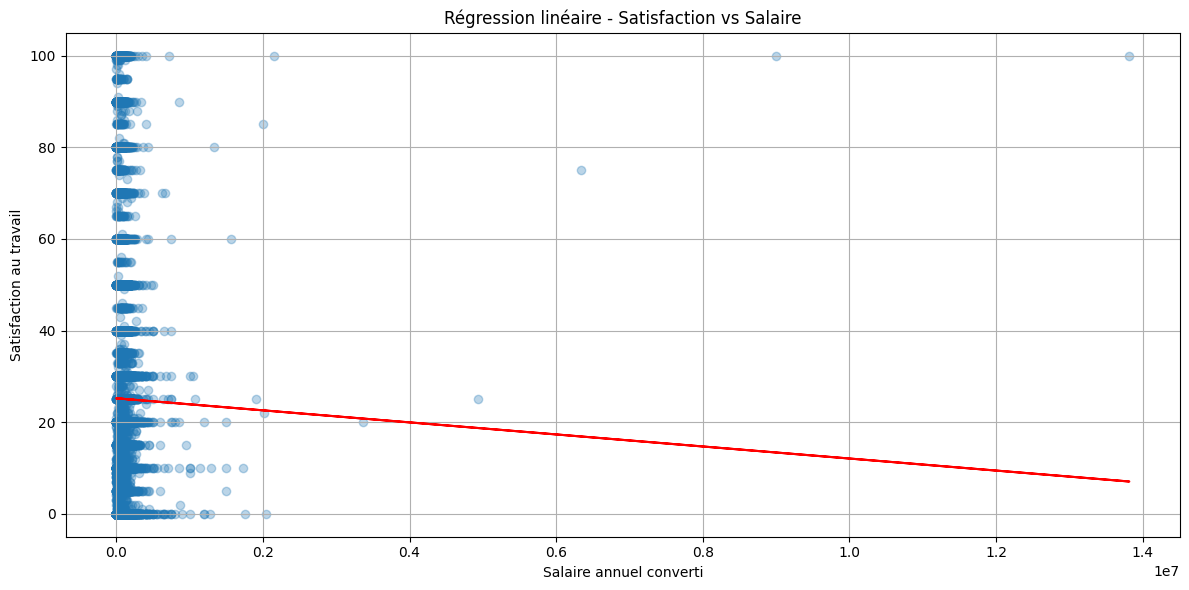

In [5]:
## Write your code here
x = df2['ConvertedCompYearly']
y = df2['JobSatPoints_6']

x_mean = x.mean()
y_mean = y.mean()

a = ((x - x_mean) * (y - y_mean)).sum() / ((x - x_mean) ** 2).sum()  
b = y_mean - a * x_mean  

plt.figure(figsize=(12, 6))
plt.scatter(x, y, alpha=0.3, label='Données')
plt.plot(x, a * x + b, color='red')
plt.xlabel('Salaire annuel converti')
plt.ylabel('Satisfaction au travail')
plt.title('Régression linéaire - Satisfaction vs Salaire')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


/tmp/ipykernel_301/1791712134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.dropna(subset=['YearsCodePro'], inplace=True)
/tmp/ipykernel_301/1791712134.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df4 = df4.groupby('Age')['YearsCodePro'].mean().reset_index()


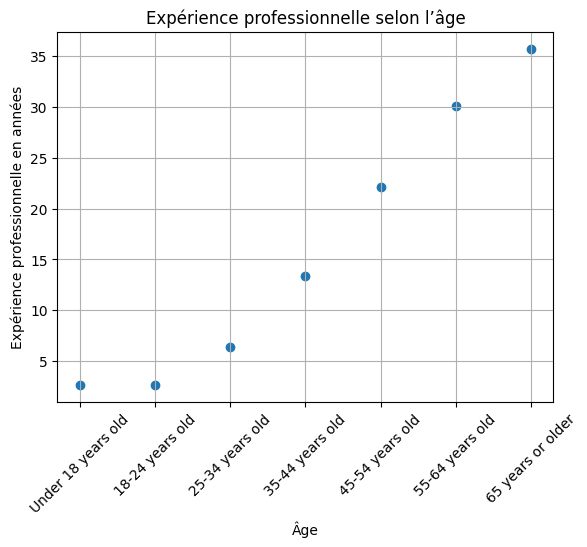

In [6]:
## Write your code here

df4 = df[['Age', 'YearsCodePro']]

df4.dropna(subset=['YearsCodePro'], inplace=True)

df4 = df4[df4['Age'] != 'Prefer not to say']

df4['YearsCodePro'] = pd.to_numeric(df4['YearsCodePro'], errors='coerce').astype('float')

age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older']
    
df4['Age'] = pd.Categorical(df4['Age'], categories=age_order, ordered=True)

df4 = df4.groupby('Age')['YearsCodePro'].mean().reset_index()

plt.scatter(x = 'Age', y = 'YearsCodePro', data = df4)
plt.xlabel('Âge')
plt.ylabel('Expérience professionnelle en années')
plt.xticks(rotation=45)
plt.title('Expérience professionnelle selon l’âge')
plt.grid(True)
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


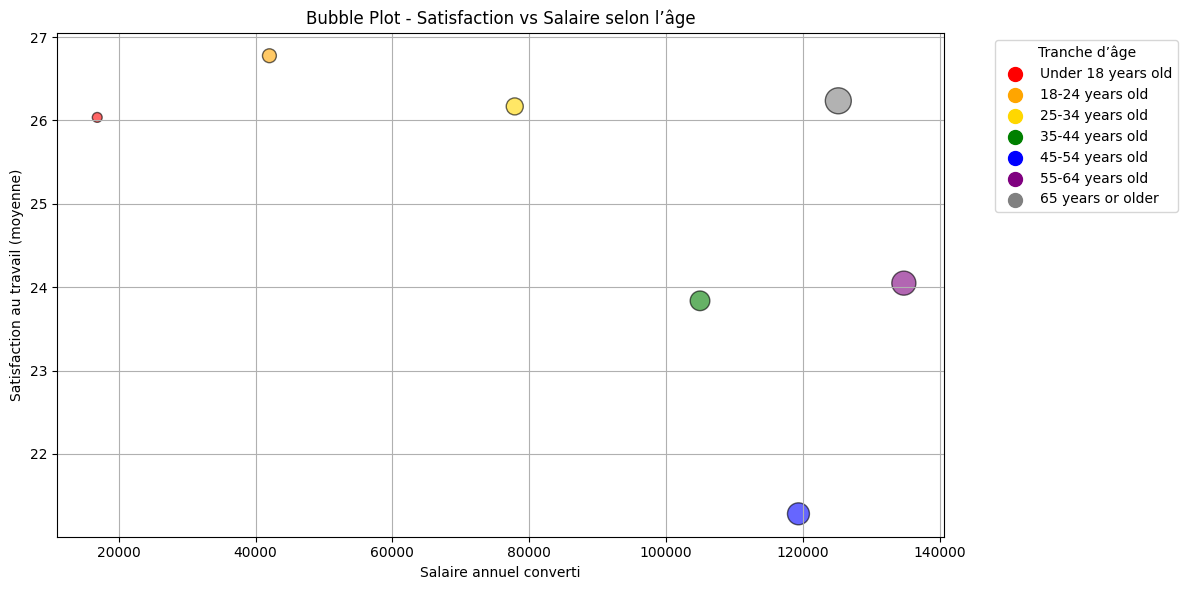

In [7]:
## Write your code here
df3 = df[['Age', 'ConvertedCompYearly', 'JobSatPoints_6']].dropna()

df3['ConvertedCompYearly'] = pd.to_numeric(df3['ConvertedCompYearly'], errors='coerce')
df3['JobSatPoints_6'] = pd.to_numeric(df3['JobSatPoints_6'], errors='coerce')

df3_grouped = df3.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].mean().reset_index()

age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older'
]
df3_grouped = df3_grouped[df3_grouped['Age'].isin(age_order)]

age_size_map = {age: (i + 1) * 50 for i, age in enumerate(age_order)}
age_color_map = {age: color for age, color in zip(age_order, ['red', 'orange', 'gold', 'green', 'blue', 'purple', 'gray'])}

df3_grouped['AgeSize'] = df3_grouped['Age'].map(age_size_map)
df3_grouped['AgeColor'] = df3_grouped['Age'].map(age_color_map)

plt.figure(figsize=(12, 6))
plt.scatter(
    x=df3_grouped['ConvertedCompYearly'],
    y=df3_grouped['JobSatPoints_6'],
    s=df3_grouped['AgeSize'],
    c=df3_grouped['AgeColor'],
    alpha=0.6,
    edgecolors='k'
)

for age in age_order:
    plt.scatter([], [], c=age_color_map[age], s=100, label=age)

plt.legend(title='Tranche d’âge', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Salaire annuel converti')
plt.ylabel('Satisfaction au travail (moyenne)')
plt.title('Bubble Plot - Satisfaction vs Salaire selon l’âge')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


/tmp/ipykernel_301/2355452897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6'], inplace=True)
/tmp/ipykernel_301/2355452897.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['JobSatPoints_6'] = pd.to_numeric(df5['JobSatPoints_6'], errors='coerce').astype('float')
/tmp/ipykernel_301/2355452897.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

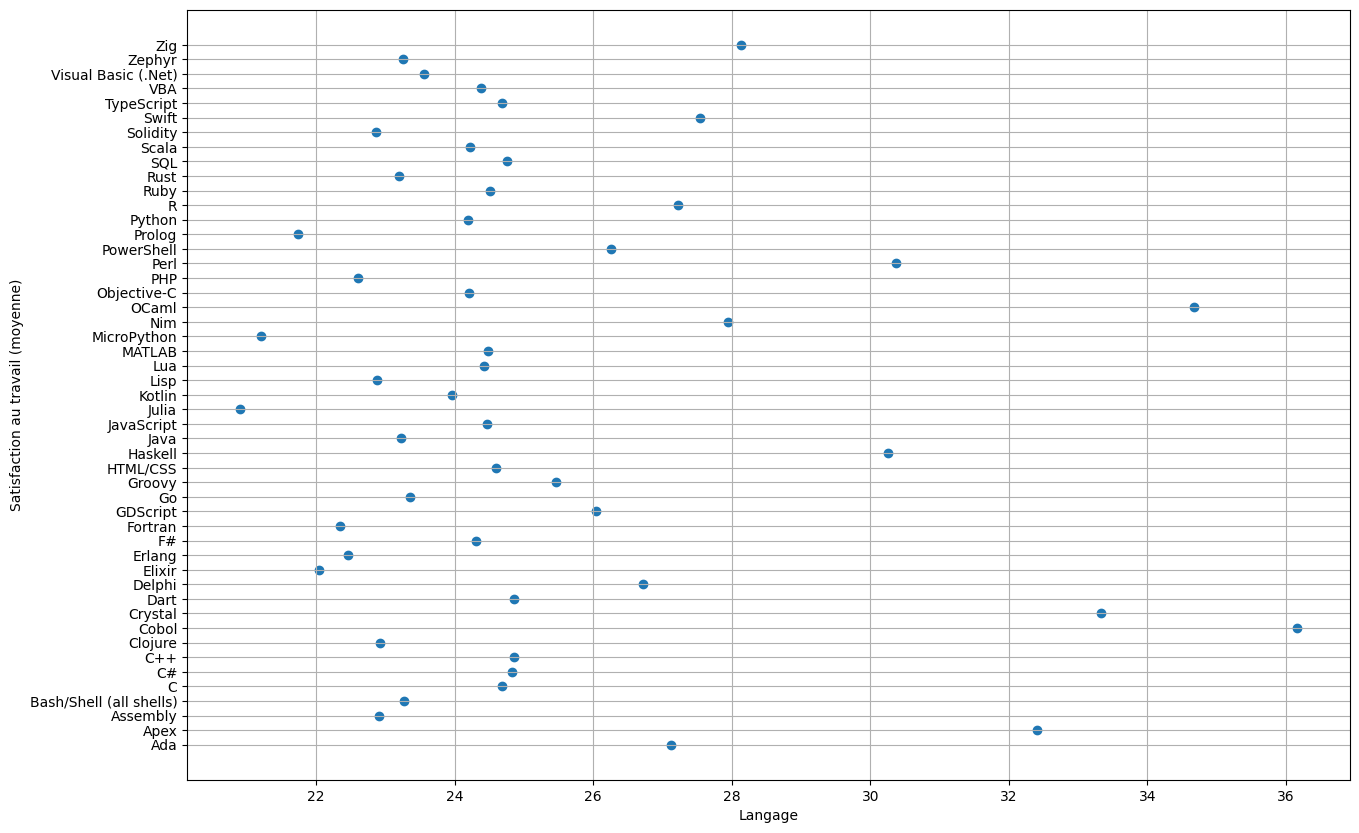

In [8]:
## Write your code here
df5 = df[['LanguageHaveWorkedWith', 'JobSatPoints_6']]

df5.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6'], inplace=True)

df5['JobSatPoints_6'] = pd.to_numeric(df5['JobSatPoints_6'], errors='coerce').astype('float')

df5['LanguageList'] = df5['LanguageHaveWorkedWith'].str.split(';').explode('LanguageList')

df5['LanguageList'] = df5['LanguageList'].str.strip()

df5 = df5.drop(columns=['LanguageHaveWorkedWith'])

df5_grouped = df5.groupby('LanguageList')['JobSatPoints_6'].mean().reset_index()

plt.figure(figsize = (15,10))
plt.scatter(x = 'JobSatPoints_6', y = 'LanguageList', data = df5_grouped)
plt.xlabel('Langage')
plt.ylabel('Satisfaction au travail (moyenne)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


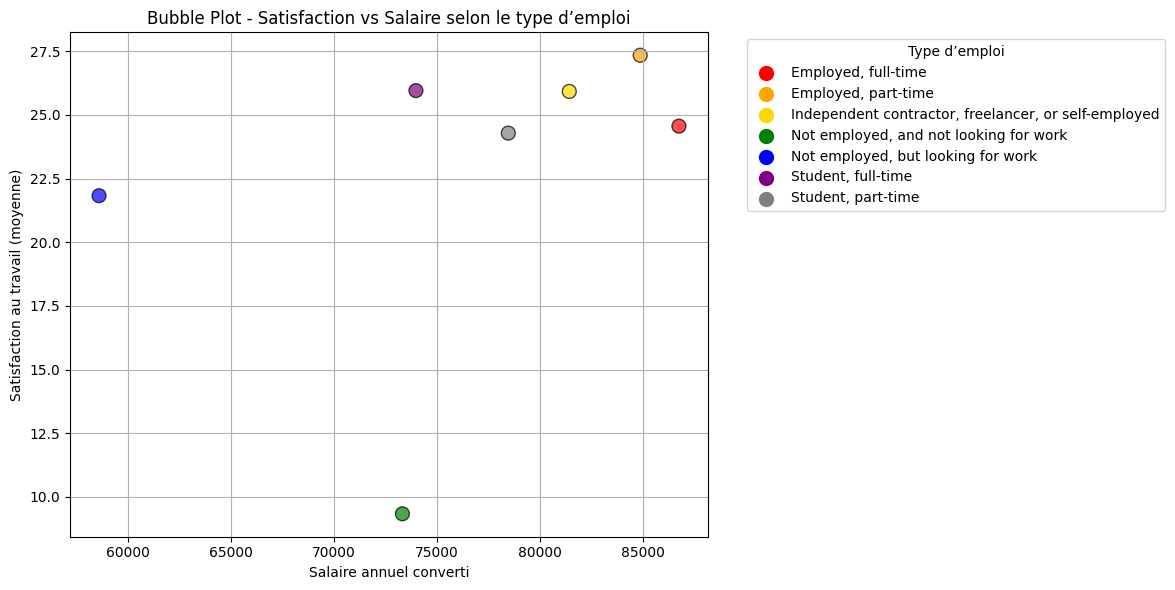

In [9]:
## Write your code here
df6 = df[['Employment', 'ConvertedCompYearly', 'JobSatPoints_6']].dropna()
df6['ConvertedCompYearly'] = pd.to_numeric(df6['ConvertedCompYearly'], errors='coerce')
df6['JobSatPoints_6'] = pd.to_numeric(df6['JobSatPoints_6'], errors='coerce')

df6['EmpList'] = df6['Employment'].str.split(';').explode('EmpList').str.strip()
df6 = df6.drop(columns=['Employment'])
df6.dropna(subset=['EmpList'], inplace=True)

df6 = df6[~df6['EmpList'].isin(['Retired'])]


df6_grouped = df6.groupby('EmpList')[['ConvertedCompYearly', 'JobSatPoints_6']].mean().reset_index()

top_emps = df6['EmpList'].value_counts().nlargest(10).index
df6_grouped = df6_grouped[df6_grouped['EmpList'].isin(top_emps)]


color_palette = ['red', 'orange', 'gold', 'green', 'blue', 'purple', 'gray', 'brown', 'cyan', 'magenta']
emp_color_map = {emp: color_palette[i % len(color_palette)] for i, emp in enumerate(df6_grouped['EmpList'])}
df6_grouped['Color'] = df6_grouped['EmpList'].map(emp_color_map)

plt.figure(figsize=(12, 6))
plt.scatter(
    x=df6_grouped['ConvertedCompYearly'],
    y=df6_grouped['JobSatPoints_6'],
    c=df6_grouped['Color'],
    s=100,
    alpha=0.7,
    edgecolors='k'
)

for emp in df6_grouped['EmpList']:
    plt.scatter([], [], c=emp_color_map[emp], label=emp, s=100)

plt.legend(title='Type d’emploi', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Salaire annuel converti')
plt.ylabel('Satisfaction au travail (moyenne)')
plt.title('Bubble Plot - Satisfaction vs Salaire selon le type d’emploi')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


/tmp/ipykernel_301/4104497255.py:74: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


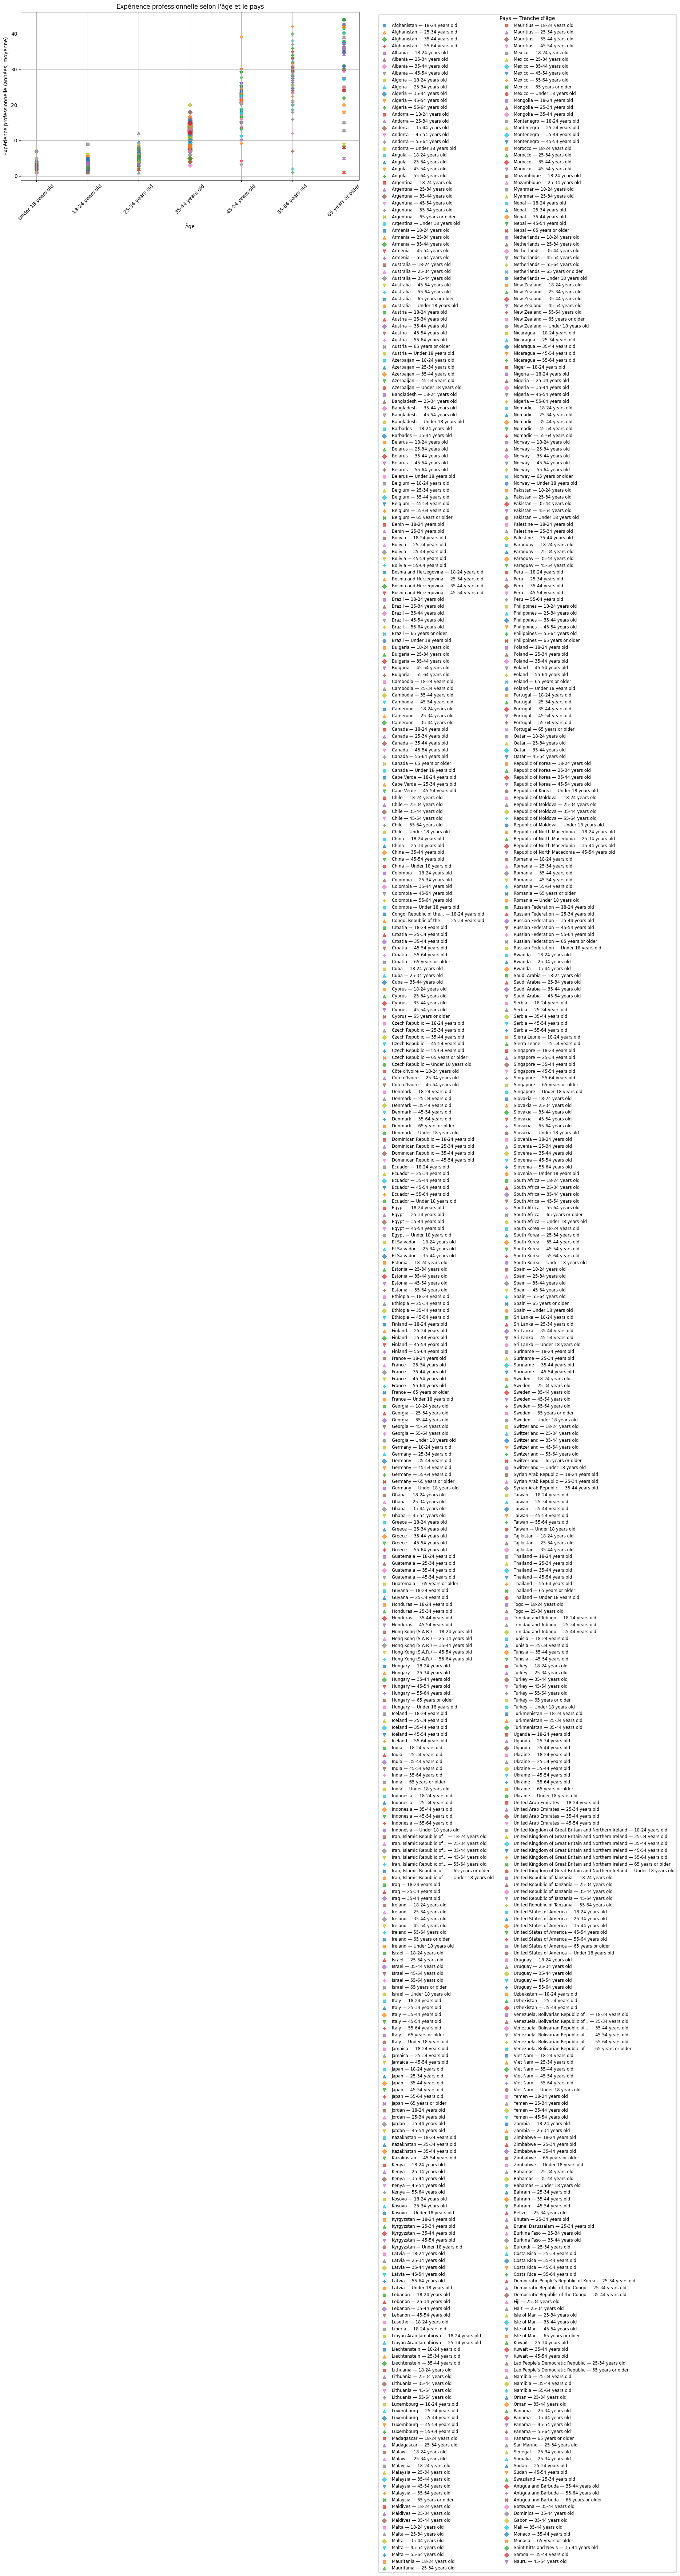

In [26]:
## Write your code here

# 1) Sélection des colonnes et suppression des NaN
df7 = df[['Age','YearsCodePro','Country']].copy()
df7.dropna(subset=['Age','YearsCodePro','Country'], inplace=True)

# 2) Suppression de "Prefer not to say" pour Age
df7 = df7[df7['Age'] != 'Prefer not to say']

# 3) Conversion en float et à nouveau dropna si besoin
df7['YearsCodePro'] = pd.to_numeric(df7['YearsCodePro'], errors='coerce').astype('float')
df7.dropna(subset=['YearsCodePro'], inplace=True)

# 4) Grouper pour calculer la moyenne par (Age, Country)
df7_grp = df7.groupby(['Age','Country'])['YearsCodePro'].mean().reset_index()

# 5) Liste d'ordre souhaité pour Age
age_order = [
    'Under 18 years old','18-24 years old','25-34 years old',
    '35-44 years old','45-54 years old','55-64 years old',
    '65 years or older'
]

# 6) Ne garder que les âges que l'on veut
df7_grp = df7_grp[df7_grp['Age'].isin(age_order)].copy()

# 7) Créer une colonne numérique pour l'axe x
df7_grp['Age_Numerical'] = df7_grp['Age'].apply(lambda x: age_order.index(x))

# 8) Définir un marqueur pour chaque tranche d'âge
markers = {
    'Under 18 years old': 'o',
    '18-24 years old': 's',
    '25-34 years old': '^',
    '35-44 years old': 'D',
    '45-54 years old': 'v',
    '55-64 years old': 'P',
    '65 years or older': 'X'
}

# 9) Tracé
plt.figure(figsize=(12,6))
unique_countries = df7_grp['Country'].unique()

for country in unique_countries:
    country_data = df7_grp[df7_grp['Country'] == country]
    for age_cat, grp in country_data.groupby('Age'):
        plt.scatter(
            x=grp['Age_Numerical'],
            y=grp['YearsCodePro'],
            label=f"{country} — {age_cat}",
            marker=markers[age_cat],
            s=40,          # taille du point, à ajuster
            alpha=0.7      # transparence pour éviter la sur-couche trop dense
        )

plt.xlabel('Âge')
plt.ylabel('Expérience professionnelle (années, moyenne)')
plt.title("Expérience professionnelle selon l'âge et le pays")
plt.xticks(ticks=range(len(age_order)), labels=age_order, rotation=45)
plt.grid(True)

# Pour atténuer la légende trop longue, on peut :
# - limiter le nombre d'éléments (par exemple top 10 pays)
# - ou la scinder en plusieurs colonnes, mais ça reste très encombré
plt.legend(
    title='Pays — Tranche d’âge',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize='small',
    ncol=2  # ou plus, si tu veux répartir sur plusieurs colonnes
)

plt.tight_layout()
plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
